In [26]:
import os
import re
from boilerpy3 import extractors

# Condenses all repeating newline characters into one single newline character
def condense_newline(text):
    return '\n'.join([p for p in re.split('\n|\r', text) if len(p) > 0])

# Returns the text from a HTML file
def parse_html(html_path):
    # Text extraction with boilerpy3
    html_extractor = extractors.ArticleExtractor()
    return condense_newline(html_extractor.get_content_from_file(html_path))

# Extracts the text from all html files in a specified directory
def html_to_text(folder):
    parsed_texts = []
    filepaths = os.listdir(folder)

    for filepath in filepaths:
        filepath_full = os.path.join(folder, filepath)
        if filepath_full.endswith(".html"):
            parsed_texts.append(parse_html(filepath_full))
    return parsed_texts

# Your directory to the folder with scraped websites
scraped_dir = './scraped_pages'
parsed_texts = html_to_text(scraped_dir)

In [23]:
from bs4 import BeautifulSoup

# Returns the text from a HTML file based on specified tags
def parse_html(html_path):
    with open(html_path, 'r') as fr:
        html_content = fr.read()
        soup = BeautifulSoup(html_content, 'html.parser')

        # Check that file is valid HTML
        if not soup.find():
            raise ValueError("File is not a valid HTML file")

        # Check the language of the file
        tag_meta_language = soup.head.find("meta", attrs={"http-equiv": "content-language"})
        if tag_meta_language:
            document_language = tag_meta_language["content"]
            if document_language and document_language not in ["en", "en-us", "en-US"]:
                raise ValueError("Language {} is not english".format(document_language))

        # Get text from the specified tags. Add more tags if necessary.
        TAGS = ['p']
        return ' '.join([condense_newline(tag.text) for tag in soup.findAll(TAGS)])

15-Gram Frequencies
6	"( SSAI ) is committed to making it possible for low-income and other disadvantaged older"
6	"SSAI ) is committed to making it possible for low-income and other disadvantaged older adults"
6	") is committed to making it possible for low-income and other disadvantaged older adults to"
6	"is committed to making it possible for low-income and other disadvantaged older adults to participate"
6	"committed to making it possible for low-income and other disadvantaged older adults to participate fully"
6	"to making it possible for low-income and other disadvantaged older adults to participate fully in"
6	"making it possible for low-income and other disadvantaged older adults to participate fully in determining"
6	"it possible for low-income and other disadvantaged older adults to participate fully in determining their"
6	"possible for low-income and other disadvantaged older adults to participate fully in determining their own"
6	"for low-income and other disadvantaged ol

[nltk_data] Downloading package punkt to /Users/brandonko/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


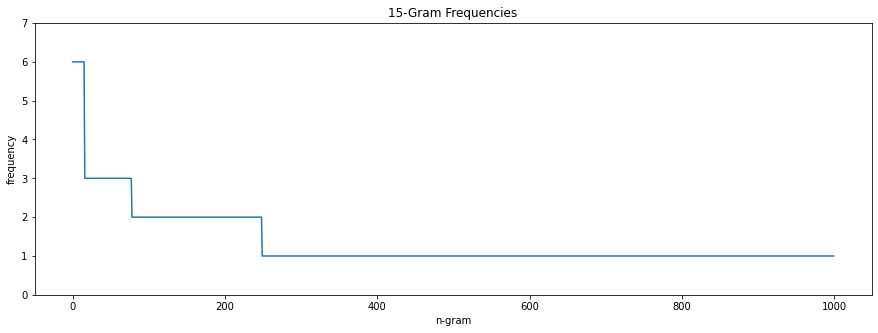

In [44]:
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Helper method for generating n-grams
def extract_ngrams_sentences(sentences, num):
    all_grams = []
    for sentence in sentences:
        n_grams = ngrams(sentence, num)
        all_grams += [ ' '.join(grams) for grams in n_grams]
    return all_grams

# Splits text up by newline and period
def split_by_newline_and_period(pages):
    sentences = []
    for page in pages:
        sentences += re.split('\n|\. ', page)
    return sentences

# Break the dataset up into sentences, split by newline characters and periods
sentences = split_by_newline_and_period(parsed_texts)

# Add unwanted strings into this array
filter_strs = []

# Filter out unwanted strings
sentences = [x for x in sentences if not any([re.search(filter_str, x, re.IGNORECASE) for filter_str in filter_strs])]

# Tokenize the sentences
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Adjust NGRAM_SIZE to capture unwanted phrases
NGRAM_SIZE = 15
ngrams_all = extract_ngrams_sentences(tokenized_sentences, NGRAM_SIZE)

# Sort the n-grams by most common
n_gram_all = nltk.FreqDist(ngrams_all).most_common()

# Print out the top 10 most commmon n-grams
print(f'{NGRAM_SIZE}-Gram Frequencies')
for gram, count in n_gram_all[:10]:
    print(f'{count}\t\"{gram}\"')

# Plot the distribution of n-grams
plt.subplots(figsize=(15,5))

plt.plot([count for _, count in n_gram_all[:1000]])
plt.xlabel('n-gram')
plt.ylabel('frequency')
plt.title(f'{NGRAM_SIZE}-Gram Frequencies')
plt.ylim(0,7)

plt.show()